In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore 
from scipy.sparse.linalg import eigsh

from skimage.measure import block_reduce

import sys
sys.path.append('../utils')
sys.path.append('../dFC')
import widefield_utils
import connectivity_measures
import numpy as np

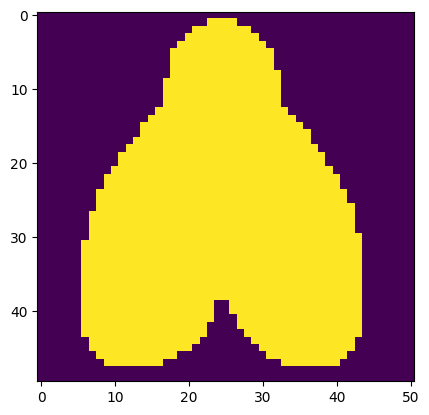

In [2]:
mask_dict = np.load(r"/home/k21208334/calcium_analyses/data/Tight_Mask_Dict.npy", allow_pickle=True)[()]

array_indicies = np.array(mask_dict['indicies'])

image = np.ravel(np.zeros((mask_dict['image_height'],mask_dict['image_width'])))
image[array_indicies]=1
plt.imshow(np.reshape(image,(300,304)))

downsampled_tight_mask = block_reduce(np.reshape(image,(300,304)), block_size=(6,6), func=np.min) 
plt.imshow(downsampled_tight_mask)

final_mask = downsampled_tight_mask>0

In [3]:
h=300
w=304
connectivity_thr = 0.2
window_size = 140

start = 0
end = 25000
connectivity_thr = 0.2

In [6]:
names = ["NXAK22.1A","NXAK14.1A","NXAK7.1B","NXAK4.1B","NRXN78.1D","NRXN78.1A"]
names_knock = ["NXAK24.1C","NXAK20.1B","NXAK16.1B","NXAK10.1A","NXAK4.1A","NRXN71.2A"]


eigenvectors_all = np.empty((0,1258))

# load clustered data 

for name in names+[names_knock[0]]:

    data = '/home/k21208334/calcium_analyses/data/leading_eigenvectors/' + name + ".npy"
    centr = np.load(data)
    eigenvectors_all = np.vstack((eigenvectors_all,centr))

In [7]:
def plot_centrality(degree,H,W,good_indices):
    degree_all = np.zeros(H*W)
    degree_all[good_indices] = degree
    fig,ax = plt.subplots()
    ax.imshow(np.reshape(degree_all,(H,W)))
    return fig

In [8]:
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(eigenvectors_all)
    Sum_of_squared_distances.append(km.inertia_)

/home/k21208334/.conda/envs/calcium_analyses/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/k21208334/.conda/envs/calcium_analyses/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/k21208334/.conda/envs/calcium_analyses/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/k21208334/.conda/envs/calcium_analyses/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the va

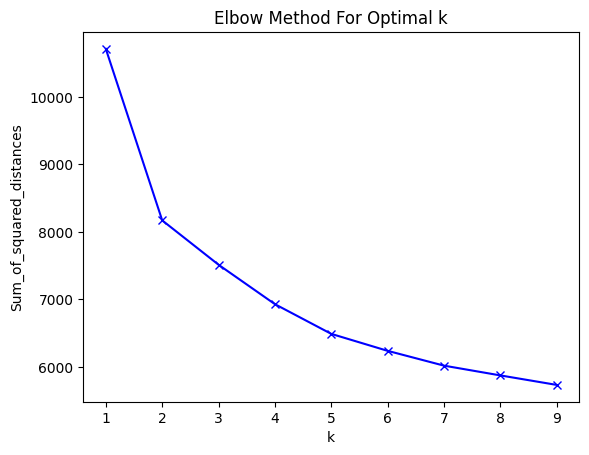

In [9]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [19]:
optimal_k = 10

km = KMeans(n_clusters=optimal_k)
km = km.fit(eigenvectors_all)

/home/k21208334/.conda/envs/calcium_analyses/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


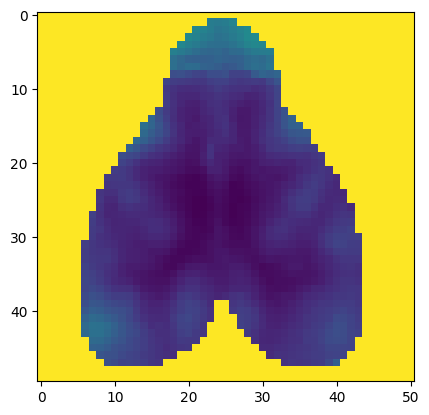

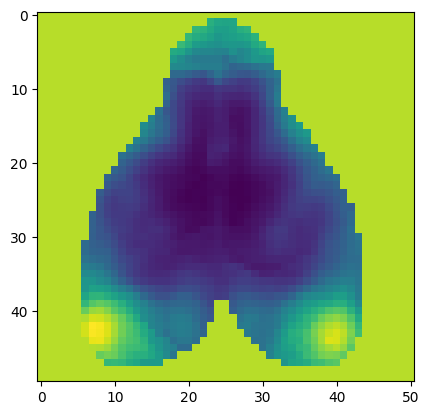

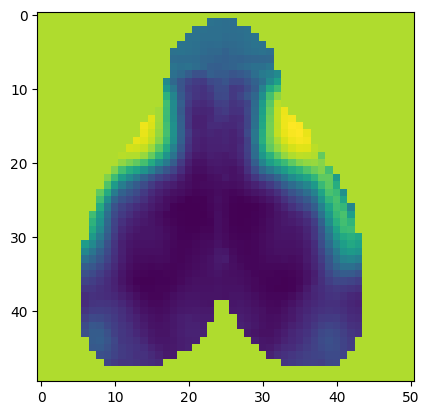

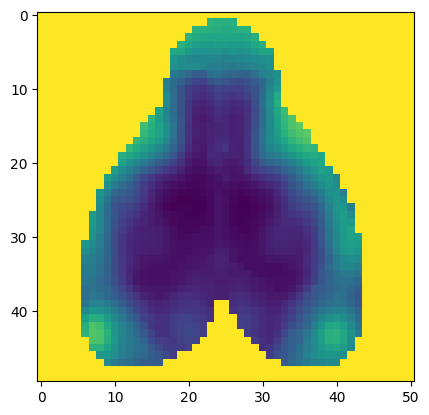

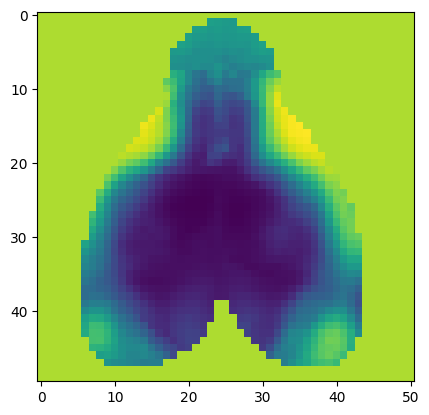

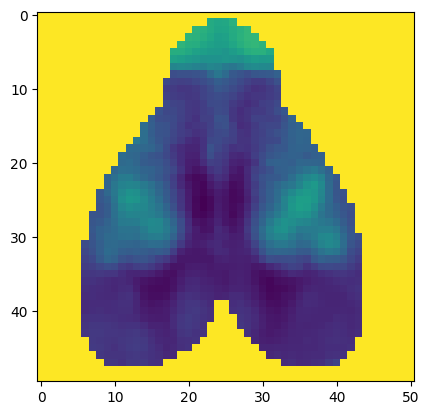

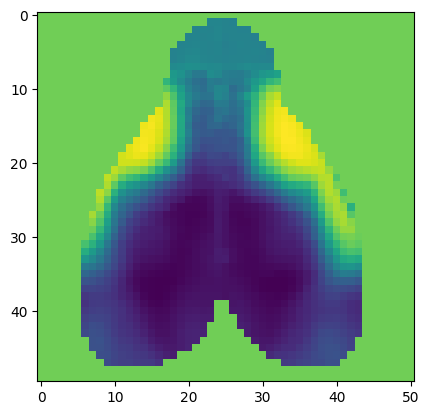

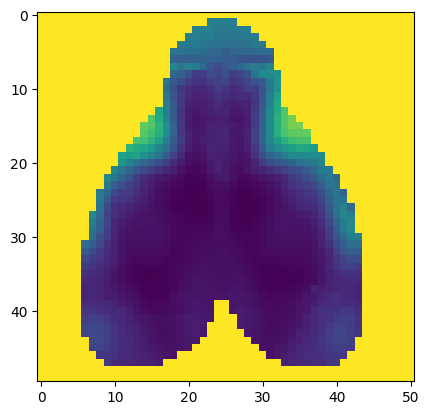

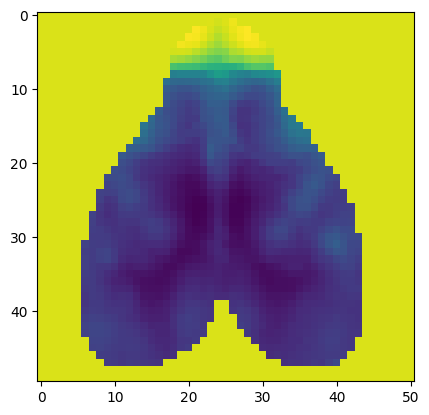

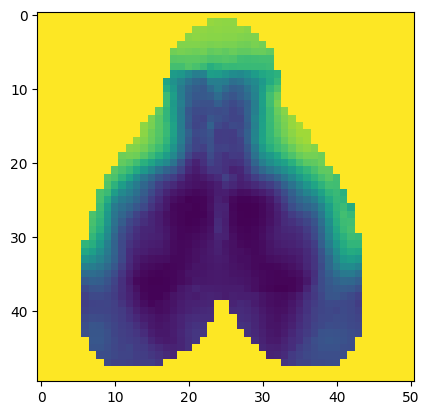

In [20]:
good_indices = np.ravel(final_mask)
for i,centroid in enumerate(km.cluster_centers_):
    fig = plot_centrality(centroid,50,51,good_indices)
    fig.savefig(str(i)+"centroid")